In [1]:
!pip install -q cohere altair sentence-transformers > /dev/null

In [2]:
import cohere
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

## Models

### Cohere API

In [3]:
api_key = ''
co = cohere.Client(api_key)

### Sentence Transformer

In [4]:
from sentence_transformers import SentenceTransformer

st_model = SentenceTransformer('all-MiniLM-L6-v2')

## Turn text into embeddings

In [5]:
sentences_ls = [
    "I like to be in my house",
    "I enjoy staying home",
    "the isotope 238u decays to 206pb"
]

### Cohere

In [6]:
sentences_embeddings_ls = np.asarray(co.embed(sentences_ls, model='embed-english-v2.0').embeddings)
sentences_embeddings_ls

array([[-1.3642578 , -0.53808594,  0.06185913, ...,  0.60791016,
        -0.2878418 ,  0.68652344],
       [-0.3840332 ,  2.3808594 ,  2.5507812 , ...,  0.12426758,
        -0.9145508 ,  0.65527344],
       [-1.1630859 , -1.9238281 , -1.1640625 , ..., -2.9785156 ,
         1.5761719 ,  0.15100098]])

In [7]:
sentences_embeddings_ls.shape

(3, 4096)

### Sentence Transformer

In [8]:
sentences_embeddings_ls = st_model.encode(sentences_ls)
sentences_embeddings_ls

array([[ 0.04602624, -0.05628698,  0.05238659, ...,  0.10794593,
        -0.04512526, -0.02710544],
       [ 0.05751314, -0.03896498,  0.04849717, ...,  0.05301371,
        -0.05489819,  0.00085395],
       [-0.0190251 ,  0.0010913 , -0.04220471, ..., -0.06778219,
         0.04150676, -0.05456711]], dtype=float32)

In [9]:
sentences_embeddings_ls.shape

(3, 384)

## Calculate dot products

In [10]:
print("Similarity between sentences 1 and 2:", np.dot(sentences_embeddings_ls[0], sentences_embeddings_ls[1]))
print("Similarity between sentences 1 and 3:", np.dot(sentences_embeddings_ls[0], sentences_embeddings_ls[2]))
print("Similarity between sentences 2 and 3:", np.dot(sentences_embeddings_ls[1], sentences_embeddings_ls[2]))

Similarity between sentences 1 and 2: 0.62823874
Similarity between sentences 1 and 3: 0.019688334
Similarity between sentences 2 and 3: 0.0049621537


In [11]:
print("Similarity between sentences 1 and 1:", np.dot(sentences_embeddings_ls[0], sentences_embeddings_ls[0]))
print("Similarity between sentences 2 and 2:", np.dot(sentences_embeddings_ls[1], sentences_embeddings_ls[1]))
print("Similarity between sentences 3 and 3:", np.dot(sentences_embeddings_ls[2], sentences_embeddings_ls[2]))

Similarity between sentences 1 and 1: 0.99999994
Similarity between sentences 2 and 2: 1.0000002
Similarity between sentences 3 and 3: 0.9999998


## Calculate cosine similarities

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similarity between sentences 1 and 2:", cosine_similarity([sentences_embeddings_ls[0]], [sentences_embeddings_ls[1]])[0][0])
print("Cosine similarity between sentences 1 and 3:", cosine_similarity([sentences_embeddings_ls[0]], [sentences_embeddings_ls[2]])[0][0])
print("Cosine similarity between sentences 2 and 3:", cosine_similarity([sentences_embeddings_ls[1]], [sentences_embeddings_ls[2]])[0][0])

Cosine similarity between sentences 1 and 2: 0.62823874
Cosine similarity between sentences 1 and 3: 0.01968835
Cosine similarity between sentences 2 and 3: 0.004962161


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similarity between sentences 1 and 1:", cosine_similarity([sentences_embeddings_ls[0]], [sentences_embeddings_ls[0]])[0][0])
print("Cosine similarity between sentences 2 and 2:", cosine_similarity([sentences_embeddings_ls[1]], [sentences_embeddings_ls[1]])[0][0])
print("Cosine similarity between sentences 3 and 3:", cosine_similarity([sentences_embeddings_ls[2]], [sentences_embeddings_ls[2]])[0][0])

Cosine similarity between sentences 1 and 1: 0.99999994
Cosine similarity between sentences 2 and 2: 1.0000002
Cosine similarity between sentences 3 and 3: 1.0


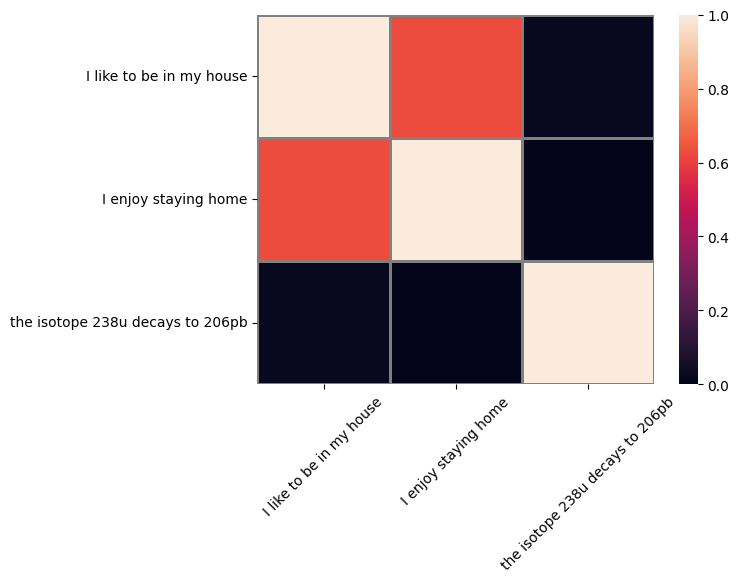

In [14]:
embeddings = [[sentences_embeddings_ls[0]], [sentences_embeddings_ls[1]], [sentences_embeddings_ls[2]]]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,
                 linewidths=1, linecolor='grey',
                 xticklabels=["I like to be in my house", "I enjoy staying home", "the isotope 238u decays to 206pb"],
                 yticklabels=["I like to be in my house", "I enjoy staying home", "the isotope 238u decays to 206pb"],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Dependencies

In [15]:
!pip install -q session-info

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.4 MB/s eta 0:00:00


In [16]:
import session_info

session_info.show()